In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
import reg_helper as RHelper
import pandas as pd
import numpy as np

In [2]:
folder = 'data/'
X = np.load(folder+'X_all.npy')
y = np.load(folder+'y_all.npy').reshape(-1)

In [3]:
from lightgbm import LGBMClassifier


In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
# Armo indices de train, val
N_train = len(X)//2
cv_s = [(np.arange(N_train), np.arange(N_train, 2*N_train))]

In [6]:
cv_s

[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
         51, 52, 53, 54, 55, 56, 57, 58]),
  array([ 59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
          72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
          85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
         111, 112, 113, 114, 115, 116, 117]))]

In [7]:
X_train = X[cv_s[0][0]]
y_train = y[cv_s[0][0]]
X_val = X[cv_s[0][1]]
y_val = y[cv_s[0][1]]

In [8]:
parameters = {
    'max_depth': np.arange(1, 31, 4),
    'learning_rate': np.logspace(-6, -1, 5),
    'reg_lambda': np.logspace(-8, -3, 5),
    'min_child_samples': np.arange(1, 20, 4),
    'min_child_weight': np.logspace(-8, -1, 5)
}

prod = 1
for k, v in parameters.items():
    prod = prod * len(v)
    print(len(v))
n_estimators = 2000
print('Cantidad de iteraciones', prod)

8
5
5
5
5
Cantidad de iteraciones 5000


In [9]:
model = LGBMClassifier(n_estimators=n_estimators)
clf = GridSearchCV(model, parameters, n_jobs=-1, verbose=1, cv=cv_s)
clf.fit(X, y, early_stopping_rounds=100, eval_set=(X_val, y_val), verbose=0)

Fitting 1 folds for each of 5000 candidates, totalling 5000 fits


/opt/homebrew/Caskroom/miniconda/base/envs/hyperparam-tunning/lib/python3.12/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/homebrew/Caskroom/miniconda/base/envs/hyperparam-tunning/lib/python3.12/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/homebrew/Caskroom/miniconda/base/envs/hyperparam-tunning/lib/python3.12/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a

GridSearchCV(cv=[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58]),
                  array([ 59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 10...
             param_grid={'learning_rate': array([1.00000000e-06, 1.77827941e-05, 3.16227766e-04, 5.62341325e-03,
       1.00000000e-01]),
                         'max_depth': array([ 1,  5,  9, 13, 17, 21, 25, 29]),
                         'min_child_samples': array([ 1,  5,  9, 13, 17]),
                         'min_child_weight': array([1.00000000e-08, 5.62341325e-07, 3.16227766e-05, 1.77827941e-03,
       1.00000000e-01]),
                         'reg_lambda': array([1.00000000e-08, 1.77827941e-07, 3.16227766e-06, 5.62341325e-05,
       1.00000000e-03])},
             verbose=1)

In [10]:
clf.best_params_
# {'learning_rate': 0.00031622776601683794,
#  'max_depth': 5,
#  'min_child_samples': 1,
#  'min_child_weight': 1e-08,
#  'reg_lambda': 1e-08}

{'learning_rate': 0.005623413251903491,
 'max_depth': 5,
 'min_child_samples': 5,
 'min_child_weight': 1e-08,
 'reg_lambda': 0.001}

In [11]:
clf.best_score_
# %% 0.7627118644067796

0.7796610169491526

In [12]:
clf.best_estimator_.score(X_train, y_train)
# 0.847457627118644

1.0

In [13]:
model = LGBMClassifier(n_estimators=n_estimators, **clf.best_params_)
model.fit(X_train, y_train, early_stopping_rounds=100, verbose=100, eval_set=(X_val, y_val))

/opt/homebrew/Caskroom/miniconda/base/envs/hyperparam-tunning/lib/python3.12/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/homebrew/Caskroom/miniconda/base/envs/hyperparam-tunning/lib/python3.12/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.580136
[200]	valid_0's binary_logloss: 0.517168
[300]	valid_0's binary_logloss: 0.49005
[400]	valid_0's binary_logloss: 0.470301
[500]	valid_0's binary_logloss: 0.463797


LGBMClassifier(learning_rate=0.005623413251903491, max_depth=5,
               min_child_samples=5, min_child_weight=1e-08, n_estimators=2000,
               reg_lambda=0.001)

In [14]:
model.score(X[cv_s[0][1]], y[cv_s[0][1]])

0.7796610169491526

In [15]:
from plot_helper import plot_results

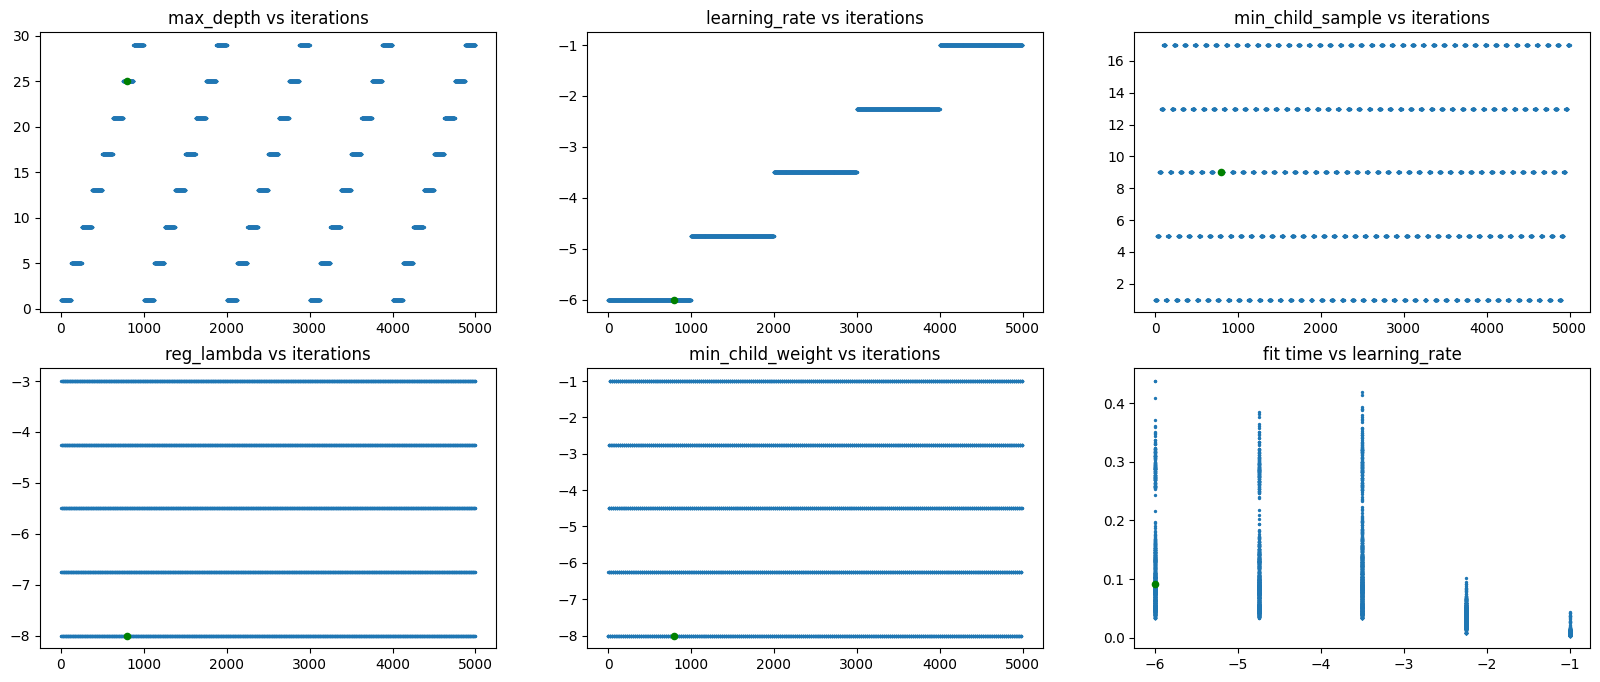

In [19]:
results_df = plot_results(clf)

In [20]:
results_df.drop(columns=['std_fit_time', 'mean_score_time', 'std_score_time', 'params', 
                         'std_test_score']).sort_values('rank_test_score').head(10)

mean_fit_time  param_learning_rate  param_max_depth  \
4155       0.010700             0.100000                5   
3159       0.027980             0.005623                5   
4174       0.011298             0.100000                5   
4173       0.009583             0.100000                5   
4172       0.005453             0.100000                5   
3154       0.021333             0.005623                5   
4171       0.004205             0.100000                5   
4170       0.004142             0.100000                5   
4169       0.004285             0.100000                5   
4168       0.004313             0.100000                5   

      param_min_child_samples  param_min_child_weight  param_reg_lambda  \
4155                        5            5.623413e-07      1.000000e-08   
3159                        5            5.623413e-07      1.000000e-03   
4174                        5            1.000000e-01      1.000000e-03   
4173                        5            1.000000e-01      5.623413e-05   
4172                        5            1.000000e-01      3.162278e-06   
3154                        5            1.000000e-08      1.000000e-03   
4171                        5            1.000000e-01      1.778279e-07   
4170                        5            1.000000e-01      1.000000e-08   
4169                        5            1.778279e-03      1.000000e-03   
4168                        5            1.778279e-03      5.623413e-05   

      split0_test_score  mean_test_score  rank_test_score  
4155           0.779661         0.779661                1  
3159           0.779661         0.779661                1  
4174           0.779661         0.779661                1  
4173           0.779661         0.779661                1  
4172           0.779661         0.779661                1  
3154           0.779661         0.779661                1  
4171           0.779661         0.779661                1  
4170           0.779661         0.779661                1  
4169           0.779661         0.779661                1  
4168           0.779661         0.779661                1

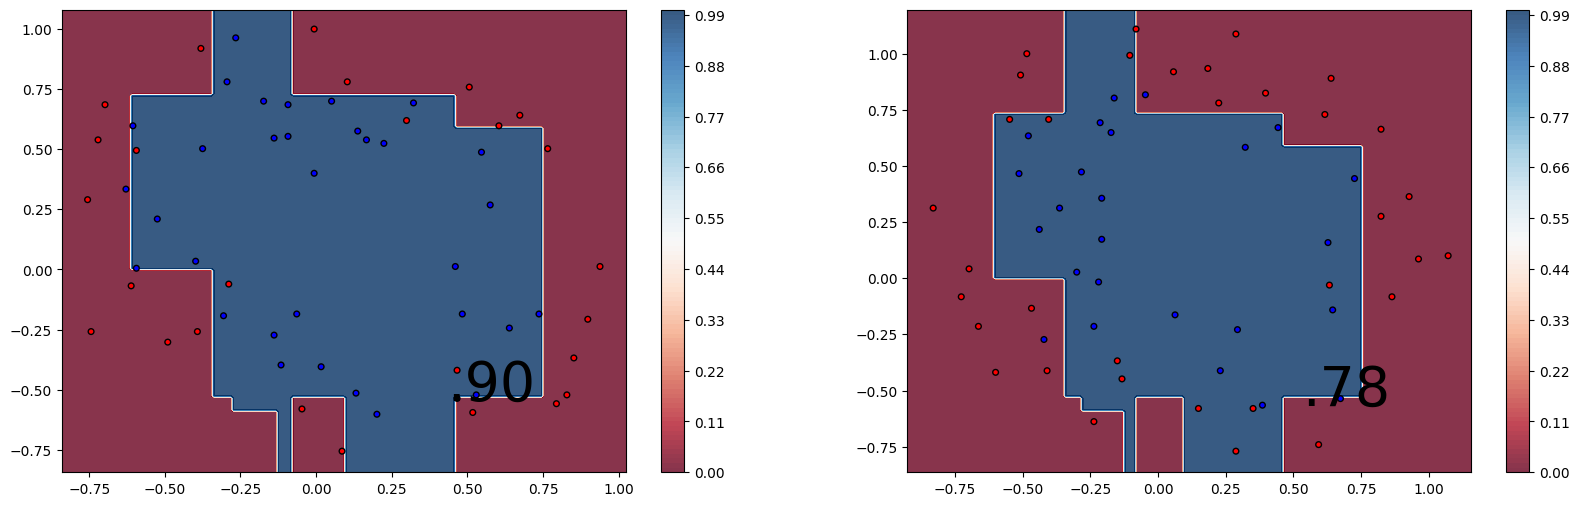

In [21]:
score_train = model.score(X_train, y_train)
score_test = model.score(X_val, y_val)
# Graficamos probabilidades en el plano de la combinación de todos los clasificadores
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, score_train, model.predict,  mesh_res=200, ax=ax1, bound_line=False)
RHelper.plot_boundaries(X_val, y_val, score_test, model.predict,  mesh_res=200, ax=ax2, bound_line=False)